In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import seaborn as sns

# Study data files
path = "./data/data_science_job_survey.csv"

# Import the CSV into a pandas DataFrame
df = pd.read_csv(path)
df

,Unnamed: 0,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
0,0,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,Well-establised,2020,100000.0,124999.0
1,1,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,Never,2020,10001.0,20000.0
2,2,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,Well-establised,2020,125000.0,149999.0
3,3,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,Well-establised,2020,70000.0,79999.0
4,4,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,Others,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10966,10966,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,Well-establised,2019,20001.0,30000.0
10967,10967,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,Exploring,2019,70000.0,79999.0
10968,10968,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,Never,2019,30000.0,39999.0
10969,10969,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,Well-establised,2019,30000.0,39999.0


In [39]:
#Delete the extra dex column 
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10971 entries, 0 to 10970
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   10971 non-null  object 
 1   Gender                10971 non-null  object 
 2   Country               10971 non-null  object 
 3   Degree                10971 non-null  object 
 4   Job Title             10971 non-null  object 
 5   Company Size          10971 non-null  object 
 6   Team Size             10971 non-null  object 
 7   ML Status in Company  10971 non-null  object 
 8   Year                  10971 non-null  int64  
 9   Min_Salary            10971 non-null  float64
 10  Max_Salary            10886 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 942.9+ KB


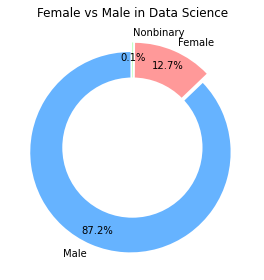

In [40]:
# Pie chart
gender = df['Gender'].value_counts()
#colors
colors = ['#66b3ff','#ff9999','#99ff99']
#explsion
explode = (0.05,0.05,0.05)
plt.pie(gender, colors = colors, labels=gender.index.values, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Female vs Male in Data Science")
plt.tight_layout()
plt.show()

In [41]:
df['Degree'].value_counts()

Master                                                               5605
Bachelor                                                             2491
Doctoral                                                             2103
Professional degree                                                   393
Some college/university study without earning a bachelor’s degree     291
No formal education past high school                                   88
Name: Degree, dtype: int64

In [42]:
#Shorten some of the kwywords 
df['Degree'] = df['Degree'].replace({"Some college/university study without earning a bachelor’s degree":
                                                    "Some college", 
                                    "No formal education past high school" : "High School"})
df

,Age,Gender,Country,Degree,Job Title,Company Size,Team Size,ML Status in Company,Year,Min_Salary,Max_Salary
0,30-34,Male,United States of America,Master,Data Engineer,"10,000 or more employees",20+,Well-establised,2020,100000.0,124999.0
1,35-39,Male,Argentina,Bachelor,Software Engineer,"1000-9,999 employees",0,Never,2020,10001.0,20000.0
2,30-34,Male,United States of America,Master,Data Scientist,250-999 employees,5-9,Well-establised,2020,125000.0,149999.0
3,35-39,Male,Germany,Doctoral,Data Scientist,"1000-9,999 employees",20+,Well-establised,2020,70000.0,79999.0
4,35-39,Male,United States of America,Doctoral,Research Scientist,0-49 employees,1-2,Others,2020,30000.0,39999.0
...,...,...,...,...,...,...,...,...,...,...,...
10966,35-39,Male,India,Bachelor,Software Engineer,"10,000 or more employees",5-9,Well-establised,2019,20001.0,30000.0
10967,45-49,Male,Spain,Master,Data Scientist,"10,000 or more employees",20+,Exploring,2019,70000.0,79999.0
10968,22-24,Male,Sweden,Master,Statistician,"1000-9,999 employees",5-9,Never,2019,30000.0,39999.0
10969,30-34,Male,Russia,Master,Research Scientist,0-49 employees,10-14,Well-establised,2019,30000.0,39999.0


In [43]:
df.Degree.value_counts()

Master                 5605
Bachelor               2491
Doctoral               2103
Professional degree     393
Some college            291
High School              88
Name: Degree, dtype: int64

In [44]:
#Part 2: Salary summary for different degrees 
grouped_degree = df.set_index('Degree').groupby(['Degree'])
survey_count = df['Degree'].value_counts()

# Calculate the average min and max starting salary
average_min_starting_salary= grouped_degree['Min_Salary'].mean()
average_max_starting_salary= grouped_degree['Max_Salary'].mean()

In [45]:
#Degree Summary display 
degree_summary = pd.DataFrame({ "Total counts": survey_count,
                               "Average Minimum starting Salary" : average_min_starting_salary, 
                               "Average Maximum starting Salary" : average_max_starting_salary
                          })
degree_summary

,Total counts,Average Minimum starting Salary,Average Maximum starting Salary
Bachelor,2491,60453.997591,72274.496353
Doctoral,2103,80898.902045,96799.683654
High School,88,71875.295455,79069.081395
Master,5605,65641.654237,79496.667744
Professional degree,393,58689.949109,72281.446154
Some college,291,64484.800687,82421.958763


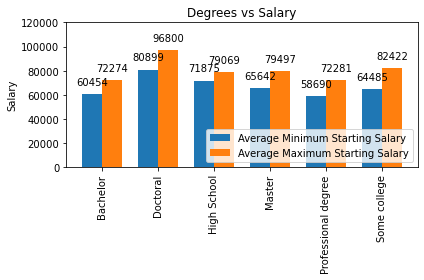

In [46]:
#Graph te Degress vs Salary chart
labels = degree_summary.index.values
min_salary = round(degree_summary['Average Minimum starting Salary'])
MAX_SALARY = round(degree_summary['Average Maximum starting Salary'])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, min_salary, width, label='Average Minimum Starting Salary')
rects2 = ax.bar(x + width/2, MAX_SALARY,width, label='Average Maximum Starting Salary')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Salary')
ax.set_title('Degrees vs Salary')
ax.set_xticks(x, labels, rotation = 90)
plt.ylim(0,120000)
ax.legend(loc = 'lower right')
ax.bar_label(rects1, padding=7)
ax.bar_label(rects2, padding=7)

fig.tight_layout()
plt.savefig('degree_graph.png')
plt.show()

In [47]:
#Part 3: Salary summary for genders
grouped_gender = df.set_index('Gender').groupby(['Gender'])
survey_count = df['Gender'].value_counts()

# Calculate the average min and max starting salary
average_min_starting_salary= grouped_gender['Min_Salary'].mean()
average_max_starting_salary= grouped_gender['Max_Salary'].mean()

#Degree Summary display 
gender_summary = pd.DataFrame({ "Total counts": survey_count,
                               "Average Minimum starting Salary" : average_min_starting_salary, 
                               "Average Maximum starting Salary" : average_max_starting_salary
                          })
gender_summary

,Total counts,Average Minimum starting Salary,Average Maximum starting Salary
Female,1397,62716.821045,78324.256815
Male,9562,67732.966430,81265.635759
Nonbinary,12,126666.666667,165415.750000
